In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# read weight-height dataset
data = "datas_ml/weight-height.csv"
gwh_df = pd.read_csv(data)
gwh_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
# 인치, 파운드 -> cm, kg으로 변환
gwh_df["Height"] = gwh_df["Height"] * 2.54
gwh_df["Weight"] = gwh_df["Weight"] * 0.4563
# read weight-height dataset
gwh_df.head()

,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414


<Figure size 1000x600 with 0 Axes>

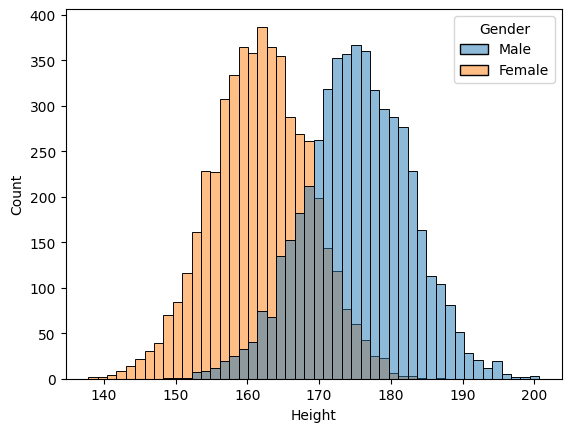

<Figure size 1000x600 with 0 Axes>

In [6]:
# feature distribution
sns.histplot(data=gwh_df, x="Height", hue="Gender")
plt.figure(figsize=(10,6))

In [7]:
# Gender 컬럼을 숫자로 변환
gwh_df['Gender'] = gwh_df['Gender'].map({"Male": 0, "Female": 1})
gwh_df.head()

,Gender,Height,Weight
0,0,187.571423,110.376033
1,0,174.706036,74.062269
2,0,188.239668,97.073652
3,0,182.196685,100.405379
4,0,177.499761,94.157414


In [8]:
# X = Gender, Height
X = gwh_df.drop(columns='Weight')

# y = Weight
y = gwh_df['Weight']

In [9]:
X.head()

,Gender,Height
0,0,187.571423
1,0,174.706036
2,0,188.239668
3,0,182.196685
4,0,177.499761


In [11]:
# 학습용, 테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8000, 2) (2000, 2)
(8000,) (2000,)


In [24]:
X_test

,Gender,Height
6252,1,174.465570
4684,0,174.826508
1731,0,168.651246
4742,0,182.700524
4521,0,170.288974
...,...,...
6412,1,167.001447
8285,1,154.258916
7853,1,157.959889
1095,0,170.353492


In [13]:
X_train

,Gender,Height
9254,1,155.934775
1561,0,189.731998
1670,0,174.009850
6087,1,167.125690
6669,1,170.590986
...,...,...
5734,1,160.908969
5191,1,149.508528
5390,1,163.386531
860,0,175.449210


In [14]:
# 학습모델 객체생성, 학습, 테스트
model_lr2 = LinearRegression()
model_lr2.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred = model_lr2.predict(X_test)
y_pred

array([75.55642225, 84.77185534, 78.14549722, ..., 57.84501902,
       79.97209066, 48.15240468], shape=(2000,))

In [17]:

MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

# 결과는 도메인마다 다름

MSE : 21.080039418120673
RMSE : 4.591300405998356


In [21]:
my_test = [[0, 180]]  # 키 170cm, 남자
my_test

[[0, 180]]

In [22]:
model_lr2.predict(my_test)

c:\Users\Admin\miniconda3\envs\eda_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([90.32326576])

In [23]:
X_test[:5]

,Gender,Height
6252,1,174.465570
4684,0,174.826508
1731,0,168.651246
4742,0,182.700524
4521,0,170.288974
